<a href="https://colab.research.google.com/github/Basil0X7/First_ML_Linear_regression/blob/main/First_ML_Linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# My First Project

## Load Data

In [1]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/first ml project/delaney_solubility_with_descriptors.csv')
df

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion,logS
0,2.59540,167.850,0.0,0.000000,-2.180
1,2.37650,133.405,0.0,0.000000,-2.000
2,2.59380,167.850,1.0,0.000000,-1.740
3,2.02890,133.405,1.0,0.000000,-1.480
4,2.91890,187.375,1.0,0.000000,-3.040
...,...,...,...,...,...
1139,1.98820,287.343,8.0,0.000000,1.144
1140,3.42130,286.114,2.0,0.333333,-4.925
1141,3.60960,308.333,4.0,0.695652,-3.893
1142,2.56214,354.815,3.0,0.521739,-3.790


# Data preparation

## Data separation as X and Y

In [2]:
y = df['logS']
# make y = price or wonted values
y

0      -2.180
1      -2.000
2      -1.740
3      -1.480
4      -3.040
        ...  
1139    1.144
1140   -4.925
1141   -3.893
1142   -3.790
1143   -2.581
Name: logS, Length: 1144, dtype: float64

In [3]:
x = df.drop(['logS'], axis=1)
# x = all colanmes - y
x

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion
0,2.59540,167.850,0.0,0.000000
1,2.37650,133.405,0.0,0.000000
2,2.59380,167.850,1.0,0.000000
3,2.02890,133.405,1.0,0.000000
4,2.91890,187.375,1.0,0.000000
...,...,...,...,...
1139,1.98820,287.343,8.0,0.000000
1140,3.42130,286.114,2.0,0.333333
1141,3.60960,308.333,4.0,0.695652
1142,2.56214,354.815,3.0,0.521739


## Data splitting

In [4]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=100)
# train = %80 , test = %20

In [5]:
x_train

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion
107,3.14280,112.216,5.0,0.000000
378,-2.07850,142.070,0.0,0.000000
529,-0.47730,168.152,0.0,0.000000
546,-0.86740,154.125,0.0,0.000000
320,1.62150,100.161,2.0,0.000000
...,...,...,...,...
802,3.00254,250.301,1.0,0.842105
53,2.13860,82.146,3.0,0.000000
350,5.76304,256.348,0.0,0.900000
79,3.89960,186.339,10.0,0.000000


In [6]:
y_train

107   -4.440
378   -1.250
529   -1.655
546   -1.886
320   -0.740
       ...  
802   -2.925
53    -2.680
350   -7.020
79    -4.800
792   -3.240
Name: logS, Length: 915, dtype: float64

# Model Bullding

## Linear regression

### **Training the model**

In [7]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

### **Applying the model to make a prediction**

In [8]:
y_lr_train_pred = lr.predict(x_train)
y_lr_test_pred = lr.predict(x_test)

In [9]:
y_lr_train_pred

array([-2.83668969,  0.84208401, -0.50930302, -0.13058053, -1.6269208 ,
       -2.86103037, -2.32208333, -4.16684323, -5.04235077, -2.29737009,
       -3.15082845, -4.33037208, -1.43700682, -2.59060064, -7.09025955,
       -2.32734557, -4.19073421, -2.63904005, -3.58104074, -3.75929058,
       -2.5501665 , -3.26968347, -2.78911367, -2.69251051, -0.77437547,
       -6.61955792, -2.99084623, -2.36975061, -7.18167736, -1.52816491,
       -4.81736265, -0.86996608, -7.09025955, -1.87404275, -2.58013247,
       -4.80953284, -4.17454084, -1.95444152, -3.50503339, -2.7411418 ,
       -1.87131835, -2.45270806, -3.07252433, -1.48988982, -3.98778754,
       -1.35216679, -0.16932277, -6.05237002, -3.29550658,  0.30513174,
       -3.25501463, -5.31993586, -0.4733928 , -4.79180882, -5.82486323,
       -2.70343539, -3.70838271, -2.4987341 , -2.12301018, -3.11393974,
       -2.79842053, -1.38274662, -4.3267103 , -3.57778946, -3.42356884,
       -9.15826626, -6.52588866, -1.75832085, -4.97842312, -1.59

### **Evaluate model performance**

In [10]:
from sklearn.metrics import mean_squared_error, r2_score

lr_train_mse = mean_squared_error(y_train, y_lr_train_pred)
lr_train_r2 = r2_score(y_train, y_lr_train_pred)

lr_test_mse = mean_squared_error(y_test, y_lr_test_pred)
lr_test_r2 = r2_score(y_test, y_lr_test_pred)


In [11]:
print('LR MSE (train) :', lr_train_mse)
print('LR R2 (train) :', lr_train_r2)
print('LR MSE (test) :', lr_test_mse)
print('LR R2 (test) :', lr_test_r2)

LR MSE (train) : 1.0075362951093687
LR R2 (train) : 0.7645051774663391
LR MSE (test) : 1.0206953660861033
LR R2 (test) : 0.7891616188563282


In [19]:
lr_results = pd.DataFrame(['Linear regression', lr_train_mse, lr_train_r2, lr_test_mse, lr_test_r2]).transpose()
lr_results.columns = ['Method', 'Training MSE', 'Training R2', 'Test MSE', 'Test R2']
lr_results

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Linear regression,1.007536,0.764505,1.020695,0.789162


## Random forest

### Training the model

In [14]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(max_depth=2, random_state=100)
rf.fit(x_train, y_train)

RandomForestRegressor(max_depth=2, random_state=100)

### Applying the model performance

In [15]:
y_rf_train_pred = rf.predict(x_train)
y_rf_test_pred = rf.predict(x_test)

### Evaluate model performance

In [16]:
from sklearn.metrics import mean_squared_error, r2_score

rf_train_mse = mean_squared_error(y_train, y_rf_train_pred)
rf_train_r2 = r2_score(y_train, y_rf_train_pred)

rf_test_mse = mean_squared_error(y_test, y_rf_test_pred)
rf_test_r2 = r2_score(y_test, y_rf_test_pred)


In [18]:
rf_results = pd.DataFrame(['Random Forest', rf_train_mse, rf_train_r2, rf_test_mse, rf_test_r2]).transpose()
rf_results.columns = ['Method', 'Training MSE', 'Training R2', 'Test MSE', 'Test R2']
rf_results

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Random Forest,1.028228,0.759669,1.407688,0.709223


## Model comparison

In [25]:
df_models = pd.concat([lr_results, rf_results], axis=0)
df_models

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Linear regression,1.007536,0.764505,1.020695,0.789162
0,Random Forest,1.028228,0.759669,1.407688,0.709223


In [26]:
df_models.reset_index(drop=True)

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Linear regression,1.007536,0.764505,1.020695,0.789162
1,Random Forest,1.028228,0.759669,1.407688,0.709223


# Data visualization of prediction results

Text(0.5, 0, 'Experimental logS')

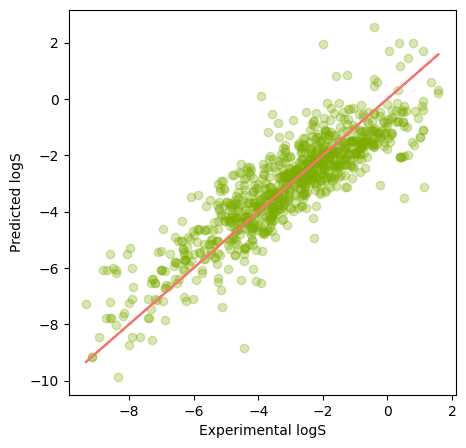

In [53]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(5,5)) # to make it thiner
plt.scatter(x = y_train, y = y_lr_train_pred, c ="#7CAE00", alpha = 0.3)
# for x , y , c for collor , Transparency

z = np.polyfit(y_train, y_lr_train_pred, 1) # z
p = np.poly1d(z) # Slope

plt.plot(y_train, (y_train), '#F8766D')
# to plot the y_train and slop + you can add your slop color here
plt.ylabel('Predicted logS') # add libel
plt.xlabel('Experimental logS') # add libel
